In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score

In [2]:
print(pd.__version__)
print(yf.__version__)

2.1.2
0.2.31


In [3]:
symbol=input("Enter ticker:")

Enter ticker:KCHOL.IS


In [4]:
tickers=["AKBNK.IS","ARCLK.IS","ASELS.IS","EREGL.IS",
        "GARAN.IS","KCHOL.IS","ALARK.IS","ISCTR.IS","KOZAL.IS",
        "OYAKC.IS","PETKM.IS","PGSUS.IS","SISE.IS","SAHOL.IS",
        "TCELL.IS","THYAO.IS","TUPRS.IS","YKBNK.IS"]
d={}
for i in tickers:
    d[i]=yf.Ticker(i).history(period="max")
    del d[i]["Dividends"]
    del d[i]["Stock Splits"]
    d[i]["Tomorrow"]=d[i]["Close"].shift(-1)
    d[i]["Target"]= (d[i]["Tomorrow"]>d[i]["Close"]).astype(int)
    d[i].drop(index=d[i].index[:1500], axis=0, inplace=True)
    d[i]["HL Diff"] = d[i]["High"]-d[i]["Low"]
    d[i]["CO Diff"]= d[i]["Open"]-d[i]["Close"]
    d[i]["MA5"]=d[i]["Close"].rolling(5).mean()
    d[i]["MA10"]=d[i]["Close"].rolling(10).mean()
    d[i]["MA15"]=d[i]["Close"].rolling(15).mean()
    d[i]["Standard Deviation"]=d[i]["Close"].rolling(5).std()
    d[i].drop(index=d[i].index[:20], axis=0, inplace=True)




In [23]:
d[symbol]

,Open,High,Low,Close,Volume,Tomorrow,Target,HL Diff,CO Diff,MA5,MA10,MA15,Standard Deviation
Date,,,,,,,,,,,,,
2006-10-16 00:00:00+03:00,2.929034,2.986466,2.929034,2.957749,8182438,3.015182,1,0.057432,-0.028716,2.875047,2.840014,2.824507,0.057375
2006-10-17 00:00:00+03:00,2.986466,3.043898,2.957750,3.015182,17504005,2.957749,0,0.086148,-0.028716,2.915250,2.863561,2.842503,0.072487
2006-10-18 00:00:00+03:00,2.986466,2.986466,2.900318,2.957749,5077035,3.072613,1,0.086148,0.028717,2.939371,2.880216,2.858201,0.058766
2006-10-19 00:00:00+03:00,3.043897,3.072613,2.986466,3.072613,8398535,2.986466,0,0.086147,-0.028716,2.981871,2.909507,2.872367,0.063747
2006-10-20 00:00:00+03:00,3.043898,3.072614,2.957750,2.986466,3331792,3.158762,1,0.114864,0.057432,2.997952,2.920993,2.883854,0.048051
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30 00:00:00+03:00,137.800003,139.500000,136.100006,136.800003,18531593,136.800003,0,3.399994,1.000000,139.920001,141.980002,144.786668,3.559774
2023-10-31 00:00:00+03:00,138.199997,140.100006,135.000000,136.800003,16846005,139.600006,1,5.100006,1.399994,138.320001,140.680002,143.500001,2.439668
2023-11-01 00:00:00+03:00,137.899994,140.000000,134.199997,139.600006,15504698,138.600006,0,5.800003,-1.700012,138.880002,140.160002,142.626668,2.322065


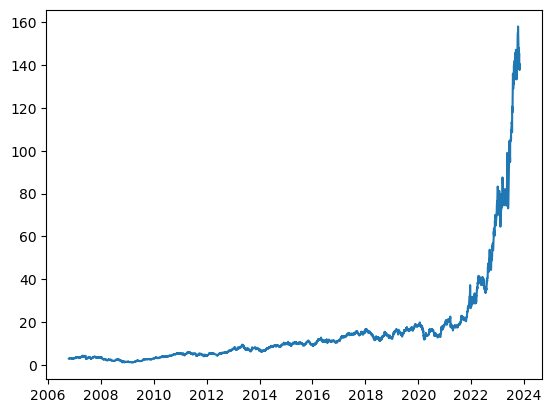

In [7]:
plt.plot(d["KCHOL.IS"]["Open"])

In [5]:
predictors=["Close","Volume","Open","High","Low","HL Diff",
           "CO Diff","MA5","MA10","MA15","Standard Deviation"]

In [6]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict_proba(test[predictors])
    preds=preds[:,1]
    preds[preds>=.54]=1
    preds[preds<.54]=0
    preds=pd.Series(preds,index=test.index,name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

In [8]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [9]:
rfc=RandomForestClassifier(n_jobs=-1,n_estimators=1750,min_samples_split=1000)
predictions=backtest(d[symbol],rfc,predictors)


In [10]:
print(accuracy_score(predictions["Target"],predictions["Predictions"]))
print(confusion_matrix(predictions["Target"],predictions["Predictions"]))
print(recall_score(predictions["Target"],predictions["Predictions"]))
print(precision_score(predictions["Target"],predictions["Predictions"]))

0.5013419216317767
[[892  32]
 [897  42]]
0.04472843450479233
0.5675675675675675


In [13]:
pd.Series(rfc.feature_importances_, index=predictors)

Close                 0.049624
Volume                0.231411
Open                  0.072526
High                  0.057143
Low                   0.058080
HL Diff               0.111193
CO Diff               0.075532
MA5                   0.073328
MA10                  0.059200
MA15                  0.061565
Standard Deviation    0.150396
dtype: float64